### Non-linear SVM Classification
Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. 

#### Polynomial Features
One approach to handling nonlinear datasets is to add more features, such as polynomial features.

In [16]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=200, noise=0.15)
polynomial_svm_clf = Pipeline([
                    ('poly_features', PolynomialFeatures(degree=3)),
                    ('scaler', StandardScaler()),
                    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000))
                ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=5000))])

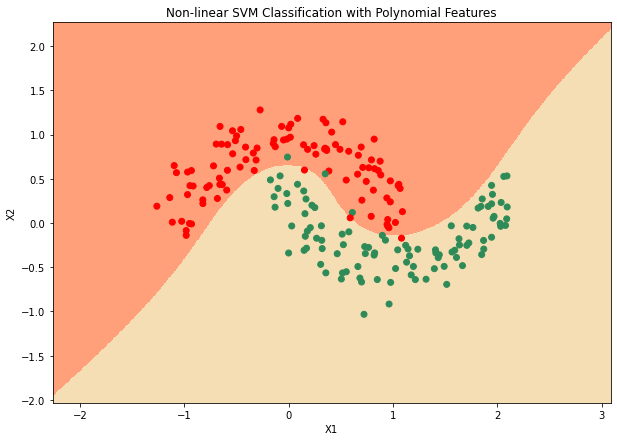

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
cmap_boundary = mcolors.ListedColormap(['lightsalmon', 'wheat'])

fig, ax = plt.subplots(figsize=(10,7))
_ = ax.contourf(xx, yy, Z, cmap=cmap_boundary)
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set_title('Non-linear SVM Classification with Polynomial Features')
_ = ax.set_xlabel('X1')
_ = ax.set_ylabel('X2')


#### Polynomial Kernel

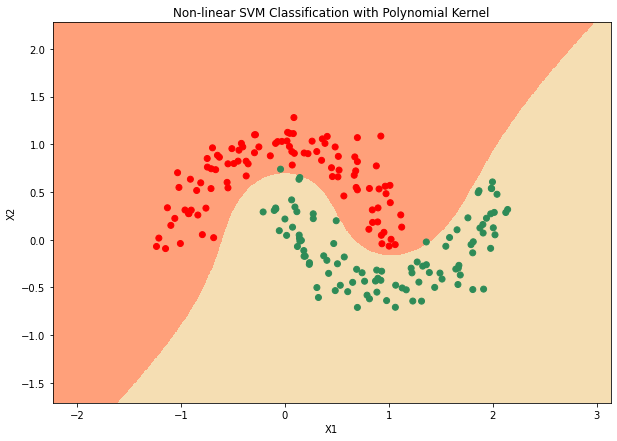

In [22]:
from sklearn.svm import SVC

X, y = make_moons(n_samples=200, noise=0.15)
poly_kernel_svm_clf = Pipeline([
                    ('scaler', StandardScaler()),
                    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
                ])
poly_kernel_svm_clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
cmap_boundary = mcolors.ListedColormap(['lightsalmon', 'wheat'])

fig, ax = plt.subplots(figsize=(10,7))
_ = ax.contourf(xx, yy, Z, cmap=cmap_boundary)
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set_title('Non-linear SVM Classification with Polynomial Kernel')
_ = ax.set_xlabel('X1')
_ = ax.set_ylabel('X2')

#### Gaussian RBF Kernel
Another technique to tackle nonlinear problems is to add features computed using a <i>similarity function</i>, which measures how much each instance resembles a particular landmark. <i>Gaussian Radial Basis Function</i> can be used as similarity function.

$$\phi_y(x,l) = exp(-\gamma ||x-l||^2)$$

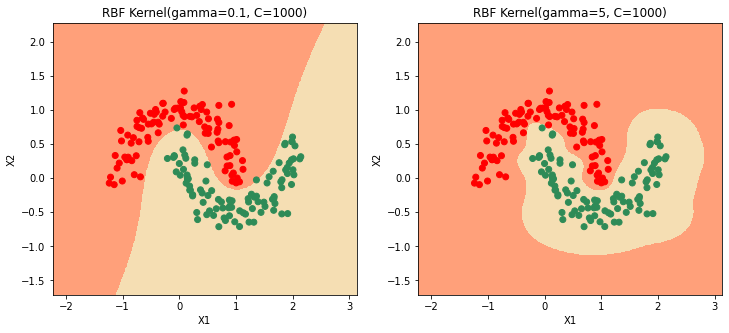

In [33]:
# gamma value = 0.1
rbf_kernel_svm_clf_1 = Pipeline([
                    ("scaler", StandardScaler()),
                    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
                    ])
rbf_kernel_svm_clf_1.fit(X, y)

# gamma value = 0.5
rbf_kernel_svm_clf_2 = Pipeline([
                    ("scaler", StandardScaler()),
                    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
                    ])
rbf_kernel_svm_clf_2.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z1 = rbf_kernel_svm_clf_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
Z2 = rbf_kernel_svm_clf_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
cmap_boundary = mcolors.ListedColormap(['lightsalmon', 'wheat'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
_ = ax1.contourf(xx, yy, Z1, cmap=cmap_boundary)
_ = ax1.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax1.set_title('RBF Kernel(gamma=0.1, C=1000)')
_ = ax1.set_xlabel('X1')
_ = ax1.set_ylabel('X2')

_ = ax2.contourf(xx, yy, Z2, cmap=cmap_boundary)
_ = ax2.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax2.set_title('RBF Kernel(gamma=5, C=1000)')
_ = ax2.set_xlabel('X1')
_ = ax2.set_ylabel('X2')